In [1]:
import numpy as np
import matplotlib.pyplot as plt
import imageio
import skimage
%matplotlib inline
plt.rcParams.update({'font.size': 12})
plt.rcParams.update({'image.interpolation': None})

## 05-01 Noise Generators

In [2]:
 f = np.asarray(imageio.imread('test-pattern.tif')).astype(float)

#### (a) Original Image:

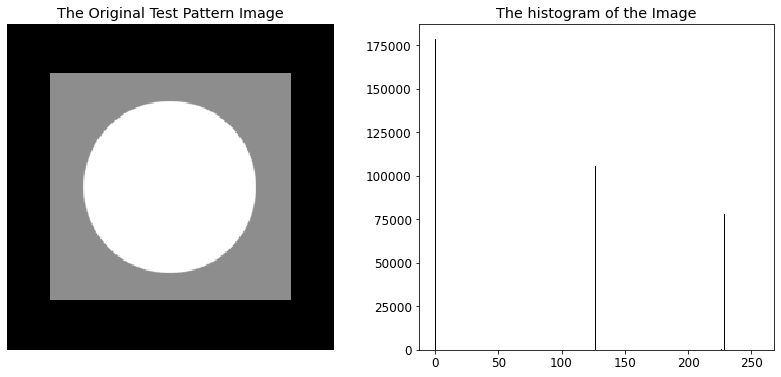

(0.0, 1.0, 0.0, 1.0)

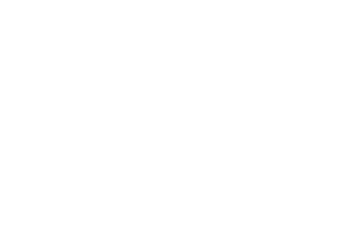

In [3]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.imshow(f,cmap='gray')
plt.axis('off')
plt.title('The Original Test Pattern Image')
plt.subplot(1,2,2)
plt.hist(f.flatten(),bins=256,range=(0,255), color='black')
plt.title('The histogram of the Image')
plt.show()
plt.axis('off')

Based on the visualization of the image and its histogram, we can determine that the image has three different intensities. The low, middle and high intensities which are allocated to the black, gray and white parts of the image. Also, the histogram plot is shown that there is more pixels in low intensities rather than middle and high intensities.  

#### (b) Gaussian Noise:

In [1]:
def add_gauss_noise(f,mu,sigma):
    eta = mu+sigma*np.random.randn(f.shape[0],f.shape[1])
    g = f+eta
    return g, eta

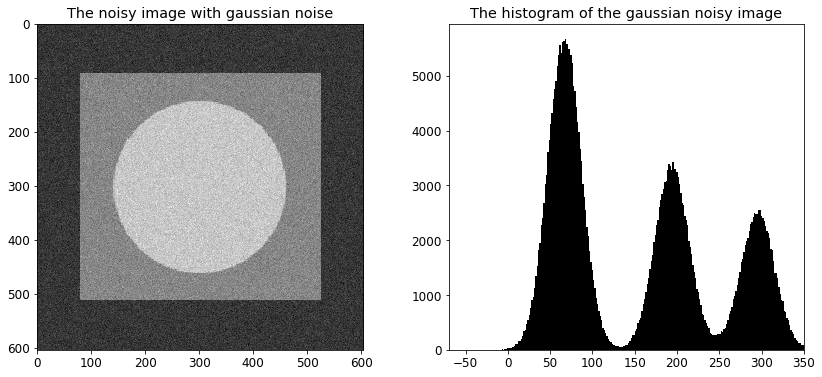

In [73]:
[g, eta] = add_gauss_noise(f,30,25)

plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.imshow(g, cmap='gray')

plt.title('The noisy image with gaussian noise')

plt.subplot(1,2,2)
plt.hist(g.flatten(),bins=256,range=(g.min(),g.max()), color='black')
plt.title('The histogram of the gaussian noisy image')
plt.xlim([-70,350])
plt.show()

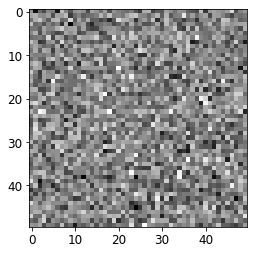

In [61]:
plt.imshow(g[0:50,0:50], cmap='gray')

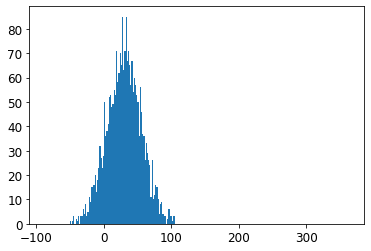

In [62]:
h,e,_ = plt.hist(g[0:50,0:50].flatten(),bins=256,range=(g.min(),g.max()))

In [63]:
s=0
s1=0
for i in np.unique(g[0:50,0:50].astype(np.uint8)): 
    s += (h[i]/2500)*i
    s1 += h[i]/2500
print(s)

65.29520000000001


In [67]:

s2=0
for i in np.unique(g[0:50,0:50].astype(np.uint8)): 
    s2 += (h[i]/2500)*(i-s)**2
print(s2**(0.5))

14.41755261339455


In [47]:
for i in np.unique(g[0:50,0:50].astype(np.uint8)): 
    print('There are '+str((h[i]).astype(int))+' pixels with intensity '+str(i))

There are 0 pixels with intensity 0
There are 0 pixels with intensity 1
There are 0 pixels with intensity 2
There are 0 pixels with intensity 3
There are 0 pixels with intensity 4
There are 0 pixels with intensity 5
There are 0 pixels with intensity 6
There are 0 pixels with intensity 7
There are 0 pixels with intensity 8
There are 0 pixels with intensity 9
There are 0 pixels with intensity 10
There are 0 pixels with intensity 11
There are 0 pixels with intensity 12
There are 0 pixels with intensity 13
There are 0 pixels with intensity 14
There are 0 pixels with intensity 15
There are 0 pixels with intensity 16
There are 0 pixels with intensity 17
There are 0 pixels with intensity 18
There are 0 pixels with intensity 19
There are 0 pixels with intensity 20
There are 1 pixels with intensity 21
There are 0 pixels with intensity 22
There are 1 pixels with intensity 23
There are 3 pixels with intensity 24
There are 0 pixels with intensity 25
There are 2 pixels with intensity 26
There are 1

In [7]:
np.shape(g[100:200,95:105])

(100, 10)

In [8]:
h1 =h[0][np.where(h[0]>0)]
print(h1/1000)

[0.002 0.001 0.002 0.001 0.002 0.001 0.001 0.002 0.002 0.004 0.003 0.003
 0.002 0.002 0.006 0.006 0.004 0.009 0.01  0.011 0.013 0.009 0.009 0.016
 0.017 0.016 0.014 0.019 0.021 0.025 0.029 0.019 0.03  0.029 0.031 0.029
 0.028 0.029 0.036 0.033 0.021 0.029 0.024 0.026 0.025 0.027 0.032 0.021
 0.025 0.024 0.019 0.02  0.024 0.019 0.013 0.013 0.007 0.016 0.005 0.011
 0.01  0.008 0.006 0.006 0.011 0.008 0.005 0.001 0.002 0.005 0.001 0.002
 0.003 0.001 0.001 0.001 0.001 0.001]


In [16]:
np.shape(i)

(127,)

In [58]:
((h[0]/1000)*i).sum()

ValueError: operands could not be broadcast together with shapes (256,) (52,) 

In [15]:
#np.unique(g[100:200,95:105].flatten())
i = np.unique(g[100:200,95:105].flatten().astype(np.uint8))
print(i)

[ 75  76  80  84  85  86  87  94  96  98  99 100 101 102 103 104 106 107
 108 110 111 112 113 114 116 117 118 119 120 121 122 123 124 125 126 127
 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145
 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163
 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181
 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199
 200 201 202 203 204 206 207 208 209 210 211 212 213 214 215 217 222 234
 235]


In [11]:
i1=np.where(h[0]>0)
print(i1[0])

[ 92  95  97  98  99 103 104 105 106 107 108 110 111 112 113 114 115 116
 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134
 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152
 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170
 171 172 173 175 182 183]


In [46]:
h[0][200]

0.0

Based on the PDF function of gaussian noise, the value of this noise are random value with a gaussian distribution. For this purpose, the np.random.randn is applied to a sample from the standard normal with mean 0 and variance 1 and then using mu (mean) and sigma (standard deviation) to provide the guassian disturbution with desired mean and standard deviation. For calculating the values of mu and sigma, comparing the histogram plot of the original image in the previous section with the histogram plot of gaussian noisy image from the text book. It shifts from zero to the higher intensity and the standard deviation is the distance between the mean (the center of bell shape) and the 0.607 of the top value of the bell shape.

#### (c) Uniform Noise:

In [53]:
def add_uniform_noise(f,a,b):
    eta = a+(b-a)*np.random.rand(f.shape[0],f.shape[1])
    g = f+eta
    return g, eta

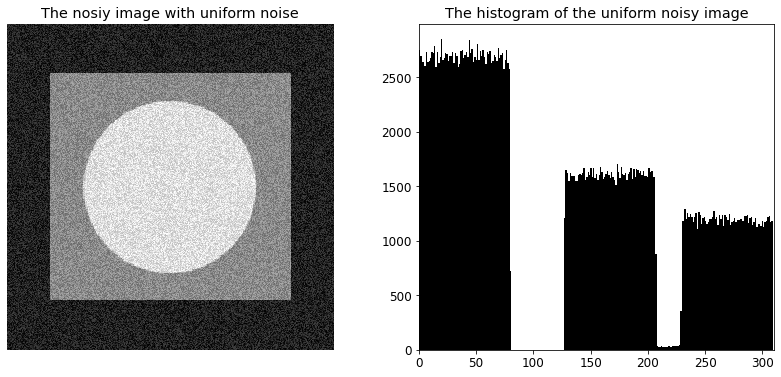

In [56]:
[g, eta] = add_uniform_noise(f,0,80)

plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.imshow(g, cmap='gray')
plt.axis('off')
plt.title('The nosiy image with uniform noise')

plt.subplot(1,2,2)
plt.hist(g.flatten(), bins=256, range=(g.min(),g.max()), color='black')
plt.title('The histogram of the uniform noisy image')
plt.xlim([0,310])
plt.show()

For uniform noise, the np.random.rand is used to generate the therandom values between a and b. The size of the noise is the same as the image size. As, the np.random.rand give the random samples from a uniform distribution over [0,1), a is added to determined the start point and then it is multiplied to (b-a. For calculating the a and b, the histogram of the original image and the histogram of image of the noisy is compared to estimate the start point (a) of the lowest intesity and its end point (b).

#### (d) Salt & Pepper Noise:

In [58]:
def add_sp_noise(f,ps,pp):

    x = np.random.rand(f.shape[0],f.shape[1])
    xp = np.where(x<=pp)
    f[xp] = 0
    xs = np.where((x>pp) & (x<=(ps+pp))) 
    f[xs] = 255
    
    return f, x

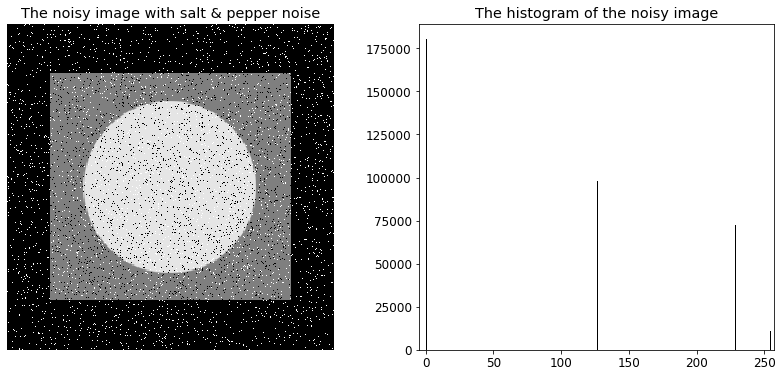

In [68]:
f = np.asarray(imageio.imread('test-pattern.tif')).astype(float)

[g, eta] = add_sp_noise(f,0.03,0.04)

plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.imshow(g, cmap='gray')
plt.axis('off')
plt.title('The noisy image with salt & pepper noise')

plt.subplot(1,2,2)
plt.hist(g.flatten(), bins=256, range=(g.min(),g.max()), color='black')
plt.title('The histogram of the noisy image')
plt.xlim([-5,257])
plt.show()

For generating the salt and pepper noise, firstly create the matrix with the exact size of the original image with randomly values between 0 and 1. Based on its PDF, the pp and ps are the probability of the number of pixels that are corrupted with pepper and salt, respectively. So, the value less than the pp in the generated matrix are allocated to pepper noise and the values between pp and pp+ps are allocated to salt noise. Then, these values are changed the intensity of the image. For pepper, the intensity become 0 (black) and for salt becomes 255 (white). For choosing the values of pp and ps, based on the histogram of the textbook, the number of pixels of the lowest intensity is increased and the the noisy image has the number of pixels in the 255. So, the pp and ps should not have high values to change the histogram of the original image.

## 05-06 Noise Filtering

In [128]:
 C = np.asarray(imageio.imread('circuitboard.tif')).astype(float)

In [114]:
print(C.shape)

(915, 948)


#### (a) Uniform Noise:

Text(0.5, 1.0, 'The corrupted image with additive uniform nosie')

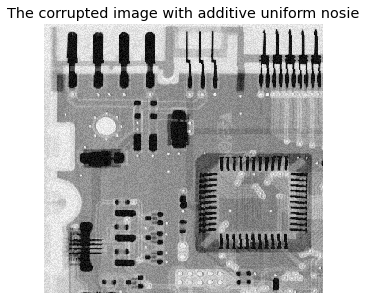

In [129]:
[I, eta] = add_uniform_noise(C,-20,20)

plt.figure(figsize=(5,5))
plt.imshow(I, cmap='gray')
plt.axis('off')
plt.title('The corrupted image with additive uniform nosie')

The textbook mentioned that the image is firstly corrupted with additive uniform noise with varaince 800 and mean 0. The value of a and b should be calculated for implementing the uniform noise on the image.

#### (b) Salt & Pepper Noise:

Text(0.5, 1.0, 'The noisy image with uniform and salt&pepper')

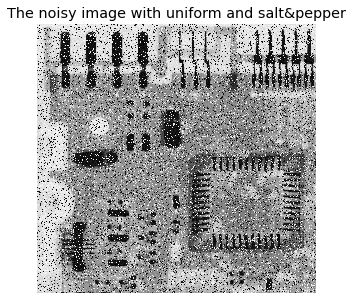

In [130]:
[I_noisy, eta] = add_sp_noise(I,0.1,0.1)

plt.figure(figsize=(5,5))
plt.imshow(I_noisy, cmap='gray')
plt.axis('off')
plt.title('The noisy image with uniform and salt&pepper')

Then, the noisy image is corrupted again with salt and pepper noise which has ps=pp=0.1

#### (c) Arithmetic Mean Filter:

In [87]:
def arithmetic_mean_filter(f,nsize):
    M = f.shape[0]
    N = f.shape[1]
    
    fhat = np.zeros([M,N])
    
    xp = int((nsize-1)/2)
    fp = np.zeros([M+(xp*2),N+(xp*2)])
    fp[xp:M+xp, xp:N+xp] = f
    
    for i in range(M):
        for j in range(N):
            s = fp[i:i+nsize, j:j+nsize]
            fhat[i,j] = (1/(nsize**2))*np.sum(s)
       
    return fhat

Text(0.5, 1.0, 'The filtered image with arithmetic mean filter')

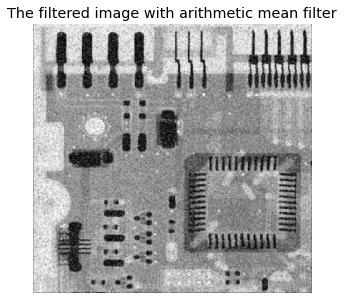

In [88]:
fhat=arithmetic_mean_filter(I_noisy,5)

plt.figure(figsize=(5,5))
plt.imshow(fhat, cmap='gray')
plt.axis('off')
plt.title('The filtered image with arithmetic mean filter')

In arithmetic mean filter, the subimage window or neighboorhood is considered. For this purpose, firstly zero padding the original image based on the size of the window. Then, moving the window on whole of image and computing the average value of each window. Then, this computed value is the intensity or value of the center of the window in the filtered image.
This filter has tried to reduced the noise effect but it could not do it very well because of the impulse noise in the noisy image. The obtained image becomes blurred and less high spatial frequency details remain in the image.


#### (d) Geometric Mean Filter:

In [105]:
def geometric_mean_filter(f,nsize):
    M = f.shape[0]
    N = f.shape[1]
    
    fhat = np.zeros([M,N])
    xp = int((nsize-1)/2)
    fp = np.zeros([M+(xp*2),N+(xp*2)])
    
    fp[xp:M+xp, xp:N+xp] = f
    
    for i in range(M):
        for j in range(N):
            s = fp[i:i+nsize, j:j+nsize]
            fhat[i,j] = (np.prod(s))**(1/(nsize**2))
       
    return fhat

In [106]:
[c_sp, eta] = add_sp_noise(C,0.1,0.1)
[I_noisy2, eta] = add_uniform_noise(c_sp,-20,20)
I_noisy2 = (I_noisy2-I_noisy2.min())/I_noisy2.max()
I_noisy2 = I_noisy2*255

In [107]:
fhat=geometric_mean_filter(I_noisy,5)
fhat2=geometric_mean_filter(I_noisy2,5)

C:\Users\henga\AppData\Local\Temp/ipykernel_15456/599961811.py:14: RuntimeWarning: invalid value encountered in double_scalars
  fhat[i,j] = (np.prod(s))**(1/(nsize**2))


Text(0.5, 1.0, 'The geometric mean filtered image I_noisy2')

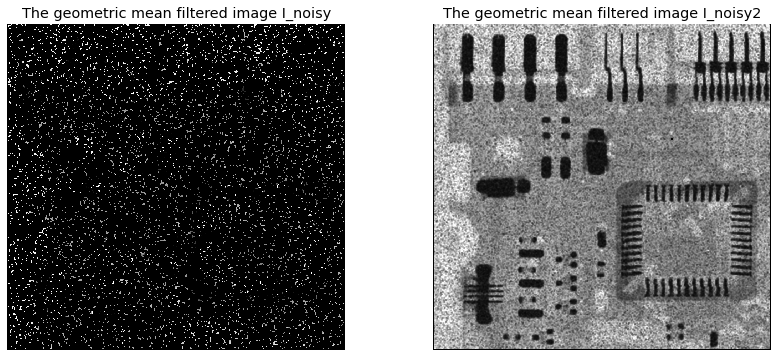

In [108]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.imshow(fhat, cmap='gray')
plt.axis('off')
plt.title('The geometric mean filtered image I_noisy')
plt.subplot(1,2,2)
plt.imshow(fhat2, cmap='gray')
plt.axis('off')
plt.title('The geometric mean filtered image I_noisy2')

In geometric mean filter, the subimage window or neighboorhood is considered. For this purpose, firstly zero padding the original image based on the size of the window. Then, moving the window on whole of image and computing the products of all pixels of each window by raising to the power of 1/mn. Then, this computed value is the intensity or value of the center of the window in the filtered image.
In I_noisy image, the image is corrupted by uniform noise and then with salt and pepper noise. The appearance of the obtained image with this filter is the highly noisy image, most of the values are black. This order of applying noises provide the low values and because this filter used the product of all the pixels in windows, the appearance is different. If very
low values present in the window, the equation of this filter will return a very small number.
In I_noisy2 noisy image, the image is corrupted by salt and pepper noise and the uniform noise. This filter retains detail better than arithmetic mean filter. it smooths local varaition in an image and the noise is reduced as a result of blurring.

#### (e) Median Filter:

In [134]:
def median_filter(f,nsize):
    M = f.shape[0]
    N = f.shape[1]
    
    fhat = np.zeros([M,N])
    xp = int((nsize-1)/2)
    fp = np.zeros([M+(xp*2),N+(xp*2)])
    
    fp[xp:M+xp, xp:N+xp] = f
    
    for i in range(M):
        for j in range(N):
            s = fp[i:i+nsize, j:j+nsize]
            sn = s.reshape(-1)
            fhat[i,j] = np.median(sn)
            #sn = np.sort(sn)
            #fhat[i,j] = sn[len(s)//2]
       
    return fhat

Text(0.5, 1.0, 'The filtered image with median filter')

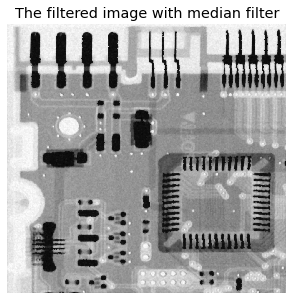

In [135]:
fhat=median_filter(I_noisy,5)

plt.figure(figsize=(5,5))
plt.imshow(fhat, cmap='gray')
plt.axis('off')
plt.title('The filtered image with median filter')

This filter, as same as two others filters, needs to pad the image and choose the subimage window. In each window, the median value of this window is chosen as the intensity of the center of the window in the resulting image. For this purpose, reshape the window to the one dimension array and calculate the median of this array. 
The obtained image in this part is less blurring compared to the previous parts and provides a good noise reduction. The effect of salt and pepper noise does not visible in this image. Totally, the median filter compared to two other filters has excellent noise removal without the smoothing effects that can occur with other smoothing filters and it is good when salt and pepper noise is present.


#### (f) Alpha-Trimmed Mean Filter:

In [138]:
def alpha_trimmed_mean_filter(f,nsize,d):
    M = f.shape[0]
    N = f.shape[1]
    
    fhat = np.zeros([M,N])
    xp = int((nsize-1)/2)
    fp = np.zeros([M+(xp*2),N+(xp*2)])
    
    fp[xp:M+xp, xp:N+xp] = f
    d2 = int(d/2)
    for i in range(M):
        for j in range(N):
            s = fp[i:i+nsize, j:j+nsize]
            sr = np.sort(s.flatten())
            sn = sr[d2:-d2]
            fhat[i,j] = (1/((nsize**2)-d))*np.sum(sn)
       
    return fhat

Text(0.5, 1.0, 'The filtered image with alph-trimmed mean filter')

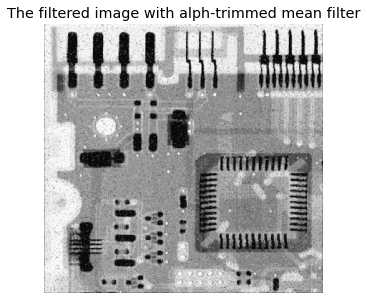

In [139]:
fhat=alpha_trimmed_mean_filter(I_noisy,5,6)

plt.figure(figsize=(5,5))
plt.imshow(fhat, cmap='gray')
plt.axis('off')
plt.title('The filtered image with alph-trimmed mean filter')

This filter is the same as others filters needs padding. I choose zero padding. Then, choosing the window and it should be moved on the whole of image to provide the new intensity for the resulting image. In each window, changing the rectangle of neighborhood to the one dimention array and ther delete the d/2 lowest and the d/2 highest intensity vaues of windows and then compute the average values of the remain array.
The obtained image remove the effect of noise especially the salt and pepper noise. The result of this part and the previous part from the median filter provide the better results rather that the arithmetic and geometric mean filters. They vividly reduced the effects of uniform and slat and peepper noise with less blurring. Although, the result from median filter is better than the alpha-trimmed mean filter.

## 05-07 Adaptive Median Filtering

In [147]:
C = np.asarray(imageio.imread('circuitboard.tif')).astype(float)
[c_sp, eta] = add_sp_noise(C,0.25,0.25)

In [148]:
def levelA(zmin, zmed, zmax, z, s, smax):
    if (zmin<zmed<zmax):
        return levelB(zmin, zmed, zmax, z, s, smax)
    else:
        s+=2
        if (s<=smax):
            return levelA(zmin, zmed, zmax, z, s, smax)
        else:
            return zmed
        
def levelB(zmin, zmed, zmax, z, s, smax):
    if(zmin<z<zmax):
        return z
    else:
        return zmed

def adaptive_median_filter(f,smax):
    
    m=f.shape[0]
    n=f.shape[1]
    zmin, zmax, zmed, z= 0,0,0,0
    s=1
    g=f
    for i in range(s,m-s-1):
        for j in range(s,n-s-1):
            window=f[i-s:i+s+1, j-s:j+s+1]
            w=window.reshape(-1)
            zmin=np.min(w)
            zmax=np.max(w)
            w=np.sort(w)
            zmed=w[len(w)//2]
            z=f[i,j]
            value = levelA(zmin, zmed, zmax, z, s, smax)
            g[i, j] = value
            
    return g
                                       

Text(0.5, 1.0, 'The filtered image with adaptive median filter')

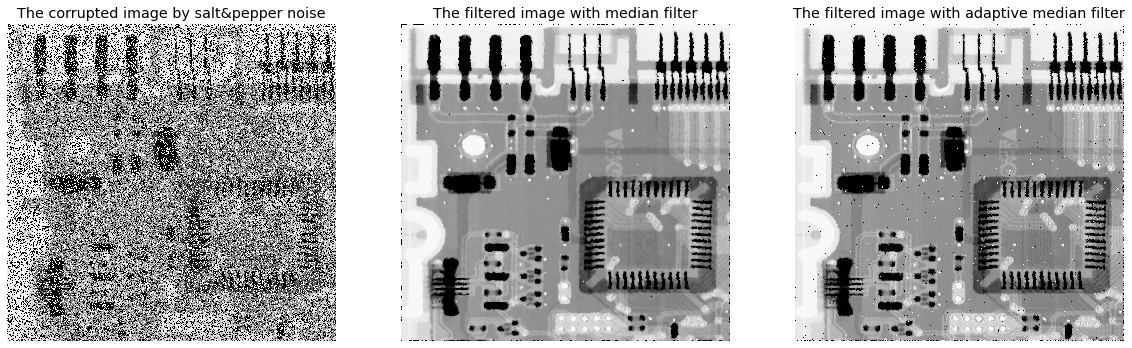

In [149]:

plt.figure(figsize=(20,10))

plt.subplot(1,3,1)
plt.imshow(c_sp, cmap='gray')
plt.axis('off')
plt.title('The corrupted image by salt&pepper noise')


fhat=median_filter(c_sp,7)


plt.subplot(1,3,2)
plt.imshow(fhat, cmap='gray')
plt.axis('off')
plt.title('The filtered image with median filter')

fhat2=adaptive_median_filter(c_sp,7)

plt.subplot(1,3,3)
plt.imshow(fhat2, cmap='gray')
plt.axis('off')
plt.title('The filtered image with adaptive median filter')

## 07-05 Visualizing Color Images

#### (a) Visualization of a uint8 Image:

In [3]:
I = np.asarray(imageio.imread('peppers.png'))

In [152]:
%whos

Variable                    Type        Data/Info
-------------------------------------------------
C                           ndarray     915x948: 867420 elems, type `float64`, 6939360 bytes (6.617889404296875 Mb)
I                           ndarray     384x512x3: 589824 elems, type `uint8`, 589824 bytes (576.0 kb)
I_noisy                     ndarray     915x948: 867420 elems, type `float64`, 6939360 bytes (6.617889404296875 Mb)
I_noisy2                    ndarray     915x948: 867420 elems, type `float64`, 6939360 bytes (6.617889404296875 Mb)
adaptive_median_filter      function    <function adaptive_median<...>er at 0x000001DDB0DD0670>
add_gauss_noise             function    <function add_gauss_noise at 0x000001DDB113CF70>
add_sp_noise                function    <function add_sp_noise at 0x000001DDB10E89D0>
add_uniform_noise           function    <function add_uniform_noi<...>se at 0x000001DDB1FACDC0>
alpha_trimmed_mean_filter   function    <function alpha_trimmed_m<...>er at 0x0000

In [153]:
print(I.shape)

(384, 512, 3)


It is shown the type of colored image is "unit8" but other gray image is "float64" and the size of this image has 3 dimentions or 3 channels (RED, GREEN, BLUE).

Text(0.5, 1.0, 'The colored image of peppers')

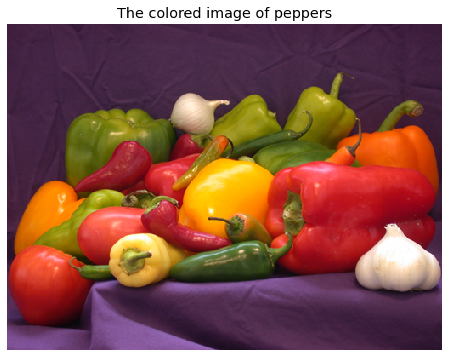

In [154]:
plt.figure(figsize=(14,6))
plt.imshow(I)
plt.axis('off')
plt.title('The colored image of peppers')

#### (b) Visualization of a float Image I:

(-0.5, 511.5, 383.5, -0.5)

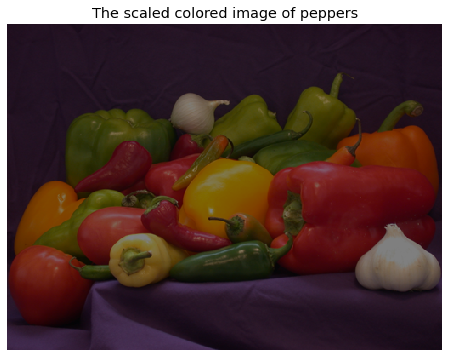

In [155]:
plt.figure(figsize=(14,6))
I_scaled=(I/2).astype(np.uint8)
plt.imshow(I_scaled)
plt.title('The scaled colored image of peppers')
plt.axis('off')

The plt.imshow scales the image to show  based on the range of pixel values in I. It uses [min(I(:)) max(I(:))] as the display range so that the minimum value in I as black and the maximum value as white. Thus, when the colored image is scaled, the appearance or the range of intensity is changed, it reduced form [0,255] to [0,128]. Thus, the image become darker.

#### (c) Visualization of a float Image II:

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Max value of the float type of the image: 255.0
Max value of the modified image: 1.0


(-0.5, 511.5, 383.5, -0.5)

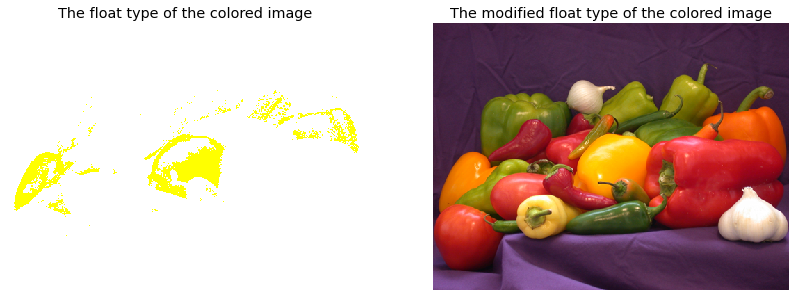

In [7]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
I_float = I.astype(float)
plt.imshow(I_float)
print("Max value of the float type of the image:", np.max(I_float))
plt.title('The float type of the colored image')
plt.axis('off')
plt.subplot(1,2,2)
Im = I_float/255
print("Max value of the modified image:",np.max(Im))
plt.title('The modified float type of the colored image')
plt.imshow(Im)
plt.axis('off')

The range of colored image in float type is [0,1] and the range of colored image in unit8 type is [0,255]. So, the appearance of float image is different because its range is between 0 and 255. For modifying the appearance, the values of colored image in float type should be scaled between 0 and 1. 

#### (d) Visualization of Color Channels:

(-0.5, 511.5, 383.5, -0.5)

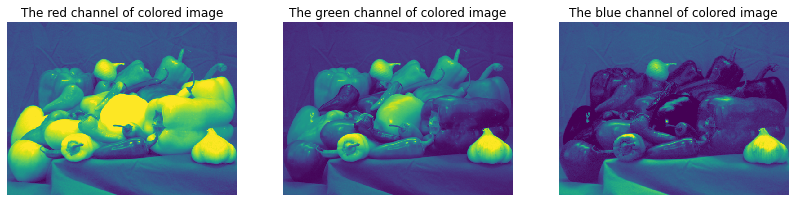

In [383]:
R = I[:,:,0]
G = I[:,:,1]
B = I[:,:,2]

plt.figure(figsize=(14,6))
plt.subplot(1,3,1)
plt.imshow(R)
plt.title('The red channel of colored image')
plt.axis('off')
plt.subplot(1,3,2)
plt.imshow(G)
plt.title('The green channel of colored image')
plt.axis('off')
plt.subplot(1,3,3)
plt.imshow(B)
plt.title('The blue channel of colored image')
plt.axis('off')

The first image represents red channel, then each element of that matrix represents an intensity of red color in that pixel, likewise in green and blue. In general, each pixel in color image has three numbers between 0 to 255 associated with it. These numbers represent intensity of red, green and blue color in that particular pixel. Thus, each of these picture show the intenisty of original image in each channel.